## Setup

In [171]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
import datetime

In [172]:
RESULTS_PATH = '../results/'

In [173]:
def _get_result_folders(kind):
    folders = os.listdir(RESULTS_PATH)
    selection = []
    for f in folders:
        if (kind + '.') in f:
            selection.append(f)
    return selection

In [174]:
DL_NAMES = 'ed mitchel petr carlos micheal euan'.split(' ')
DL_FORFITS = [
    [9, 10],
    [],
    [],
    [5, 9],
    [5, 9, 10, 14],
    [5]
]
DL_RESULT_FOLDERS = _get_result_folders('dl')
DL_TOTALS = [52,91,55,33,32,46]

SEARCH_NAMES = 'cameron corey adam andrew'.split(' ')
SEARCH_FORFITS = [
    [5, 8, 9,  10, 11, 12, 13, 14],
    [5,            11, 12, 13, 14],
    [5,    9,      11,     13, 14],
    [5, 8, 9,              13, 14],
]
SEARCH_FOLDERS = _get_result_folders('search')
SEARCH_ERRORS = [41, 22, 42, 29]
SEARCH_TOTALS = [54, 28, 53, 44]

## Methods

In [94]:
def _get_total_seconds(folder):
    path = RESULTS_PATH + folder + '/times.txt'
    raw_times = open(path, 'r').read().split('\n')
    time_deltas = []
    for raw_time in raw_times:
        if '.' not in raw_time:
            continue
        raw_mins, raw_secs = raw_time.split('.')
        time_deltas.append(
            int(raw_mins) * 60 + int(raw_secs)
        )
    return time_deltas

In [95]:
def _get_queries(folder):
    path = RESULTS_PATH + folder + '/queries.txt'
    lines = open(path, 'r').read().split('\n')
    code_count = 0
    user_count = 0
    for l in lines:
        l = l.lower()
        for char in l:
            if char == '.':
                code_count += 1
            elif char == 'u':
                user_count += 1
    return code_count, user_count

In [96]:
def avg(l):
    t = 0
    for v in l:
        t += v
    return t/len(l)

In [97]:
def _get_did_forfit(forfits):
    did_forfit = [False] * (14-3)
    for f in forfits:
        did_forfit[f - 4] = True
    return did_forfit

In [98]:
def arr_col(rows, col):
    raw_values = [row[col] for row in rows]
    values = []
    for rv in raw_values:
        if rv:
            values.append(rv)
    return np.array(values)

In [145]:
SEARCH_FOLDERS

['search.cameron', 'search.corey', 'search.adam', 'search.andrew']

In [146]:
SEARCH_FOLDERS = [
    'search.adam', 'search.andrew', 'search.cameron', 'search.corey'
]

total_c = []
total_a = []
search_accuracies = []

for i in range(len(SEARCH_ERRORS)):
    totals, errors = SEARCH_TOTALS[i], SEARCH_ERRORS[i]
    total_c.append(errors)
    total_a.append(totals)

    acc = 100 * (1 - errors/totals)
    search_accuracies.append(acc)
    
total_u = []
user_accuracies = []
    
for i in range(len(SEARCH_FOLDERS)):
    code_count, user_count = _get_queries(SEARCH_FOLDERS[i])
    total_count = SEARCH_TOTALS[i]
    
    total_u.append(user_count)
    
    acc = 100 * (1 - user_count/total_count)
    user_accuracies.append(acc)
    
search_user_accuracies = user_accuracies

In [147]:
search_user_accuracies

[66.66666666666667, 60.71428571428572, 58.490566037735846, 79.54545454545455]

In [148]:
total_c = []
total_u = []
total_a = []
model_accuracies = []
user_accuracies = []
all_accuracies = []

for i in range(len(DL_RESULT_FOLDERS)):
    code_count, user_count = _get_queries(DL_RESULT_FOLDERS[i])
    total_count = DL_TOTALS[i]
    
    total_c.append(code_count)
    total_u.append(user_count)
    total_a.append(total_count)
    
    acc = 100 * (1 - code_count/total_count)
    model_accuracies.append(acc)
    acc = 100 * (1 - user_count/total_count)
    user_accuracies.append(acc)
    acc = 100 * (1 - (code_count + user_count)/total_count)
    all_accuracies.append(acc)
    
dl_accuracies = all_accuracies

dl_user_accuracies = user_accuracies

In [204]:
dl_accuracies

[63.46153846153846,
 50.54945054945055,
 60.0,
 66.66666666666667,
 81.25,
 60.86956521739131]

In [203]:
dl_user_accuracies

[88.46153846153845,
 76.92307692307692,
 92.72727272727272,
 90.9090909090909,
 100.0,
 97.82608695652173]

## Results

In [149]:
sorted(dl_accuracies), sorted(search_accuracies)

([50.54945054945055,
  60.0,
  60.86956521739131,
  63.46153846153846,
  66.66666666666667,
  81.25],
 [20.75471698113207, 21.42857142857143, 24.07407407407407, 34.09090909090909])

In [150]:
np.std(dl_accuracies), np.std(search_accuracies)

(9.232545166060994, 5.344370252848937)

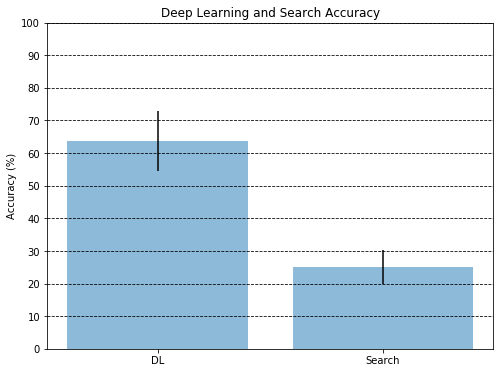

In [151]:
figure(figsize=(8, 6))

preformance = [avg(dl_accuracies), avg(search_accuracies)]

y_pos = np.arange(len(preformance))
 

plt.bar(
    y_pos,
    preformance,
    yerr=[
        np.std(all_accuracies),
        np.std(search_accuracies)
    ],
    align='center', alpha=0.5
)
plt.xticks(y_pos, ('DL', 'Search'))
plt.yticks(range(0, 101, 10))
plt.grid(which='major', axis='y', color='black', linestyle='dashed')
plt.ylabel('Accuracy (%)')
plt.title('Deep Learning and Search Accuracy')

plt.show()

In [202]:
avg(dl_accuracies), avg(search_accuracies)

(63.79953681584117, 25.087067893671666)

In [155]:
np.average(dl_user_accuracies), np.average(search_user_accuracies)

(91.14117766291679, 66.3542432410357)

In [156]:
mod_preformance

[72.65835915292438, 58.73282465263597]

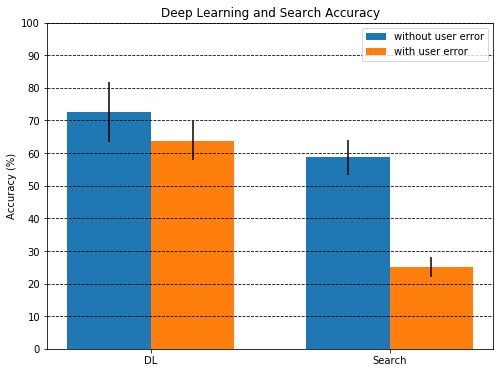

In [154]:
ue = 100 - np.mean(user_accuracies)

bar_width = 0.35

figure(figsize=(8, 6))

preformance = [avg(dl_accuracies), avg(search_accuracies)]
ma = list(np.array(dl_accuracies) - np.array(dl_user_accuracies) + 100)
mb = list(np.array(search_accuracies) - np.array(search_user_accuracies) + 100)
mod_preformance = [avg(ma), avg(mb)]

y_pos = np.arange(len(preformance))
 
plt.bar(y_pos - bar_width/2, mod_preformance, bar_width, yerr=[np.std(dl_accuracies), np.std(search_accuracies)], align='center', label='without user error')
plt.bar(y_pos + bar_width/2, preformance, bar_width, yerr=[np.std(ma), np.std(mb)], align='center', label='with user error')
plt.xticks(y_pos, ('DL', 'Search'))
plt.yticks(range(0, 101, 10))
plt.grid(which='major', axis='y', color='black', linestyle='dashed')
plt.ylabel('Accuracy (%)')
plt.title('Deep Learning and Search Accuracy')
plt.legend()
plt.show()

## Graph Accuracy by User for each Backend

In [38]:
DL_DESC_COUNT, SEARCH_DESC_COUNT

([32, 33, 91, 52, 55, 46], [54, 53, 28, 44])

## Show graph of avg number of queries for each backend.

In [23]:
DL_DESC_COUNT = [32,33,91,52,55,46]
SEARCH_DESC_COUNT = [54,53,28,44]

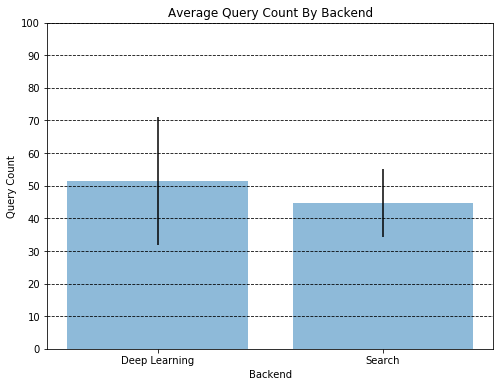

In [143]:
figure(figsize=(8, 6))

aa = avg(all_accuracies)

y_pos = np.arange(2)

plt.bar(
    y_pos,
    [
        np.mean(DL_DESC_COUNT),
        np.mean(SEARCH_DESC_COUNT)
    ],
    yerr=[
        np.std(DL_DESC_COUNT),
        np.std(SEARCH_DESC_COUNT)
    ],
    align='center', alpha=0.5
)

plt.xticks(y_pos, ('Deep Learning', 'Search'))
plt.yticks(range(0, 101, 10))
plt.grid(which='major', axis='y', color='black', linestyle='dashed')
plt.ylabel('Query Count')
plt.xlabel('Backend')
plt.title('Average Query Count By Backend')

plt.show()

In [52]:
np.mean(DL_DESC_COUNT + SEARCH_DESC_COUNT), np.mean(DL_DESC_COUNT),np.mean(SEARCH_DESC_COUNT)

(48.8, 51.5, 44.75)

In [3]:
'''

    !!! Show a breakdown of error causes for DL using a stacked graph. !!!

'''

'\n\n    !!! Show a breakdown of error causes for DL using a stacked graph. !!!\n\n'

In [159]:
times

[259, 573, 35, 263, 705, 445, 563, 249, 104, 64, 5]

In [160]:
did_forfit

[False, True, False, False, True, True, False, False, False, True, True]

In [168]:
[False == v for v in did_forfit]

[True, False, True, True, False, False, True, True, True, False, False]

In [184]:
i = 0
times = _get_total_seconds(SEARCH_FOLDERS[i])
did_forfit = _get_did_forfit(SEARCH_FORFITS[i])

results = []
for i in range(len(times)):
    if did_forfit[i]:
        results.append(0)
    else:
        results.append(times[i])
        
all_r = []
for i in range(4):
    times = _get_total_seconds(SEARCH_FOLDERS[i])
    did_forfit = _get_did_forfit(SEARCH_FORFITS[i])

    results = []
    for i in range(len(times)):
        if did_forfit[i]:
            results.append(0)
        else:
            results.append(times[i])
    all_r.append(results)
    
stds = []
means = []
for i in range(len(all_r[0])):
    values = arr_col(all_r, i)
    if len(values) <= 1:
        stds.append(0)
        means.append(0)
    else:
        std = np.std(values)
        mean = np.mean(values)
        stds.append(std)
        means.append(mean)

search_means, search_stds = means, stds

In [190]:
_get_total_seconds(SEARCH_FOLDERS[0])

[137, 141, 191, 211, 359, 283, 433, 421, 442, 210, 83]

In [189]:
all_r

[[137, 0, 191, 211, 0, 0, 0, 0, 0, 0, 0],
 [259, 0, 35, 263, 705, 445, 563, 0, 0, 0, 0],
 [185, 0, 166, 343, 442, 0, 620, 0, 133, 0, 0],
 [114, 0, 130, 395, 0, 0, 301, 466, 89, 0, 0]]

In [188]:
arr_col(all_r, 1)

array([], dtype=float64)

In [185]:
figure(figsize=(8, 6))

y_pos = np.arange(len(all_r[0]))

plt.bar(y_pos, means, yerr=stds, align='center', alpha=0.5)

plt.xticks(y_pos)
plt.yticks(range(0, 701, 100))
plt.grid(which='major', axis='y', color='black', linestyle='dashed')
plt.ylabel('Time (seconds)')
plt.xlabel('Fucntion')
plt.title('Average time to complete functions using Search.')

plt.show()

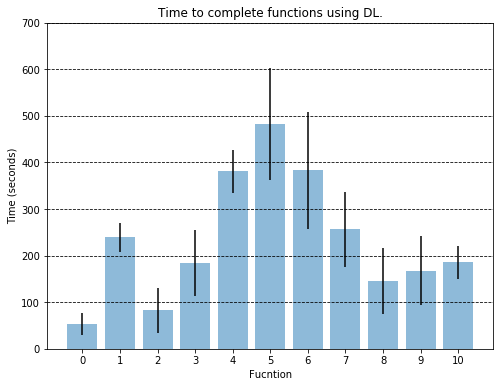

In [385]:
i = 0
times = _get_total_seconds(DL_RESULT_FOLDERS[i])
did_forfit = _get_did_forfit(DL_FORFITS[i])

results = []
for i in range(len(times)):
    if did_forfit[i]:
        results.append(0)
    else:
        results.append(times[i])
        
all_r = []
for i in range(4):
    times = _get_total_seconds(DL_RESULT_FOLDERS[i])
    did_forfit = _get_did_forfit(DL_FORFITS[i])

    results = []
    for i in range(len(times)):
        if did_forfit[i]:
            results.append(0)
        else:
            results.append(times[i])
    all_r.append(results)

    
stds = []
means = []
for i in range(len(all_r[0])):
    values = arr_col(all_r, i)
    if len(values) <= 1:
        stds.append(0)
        means.append(0)
    else:
        std = np.std(values)
        mean = np.mean(values)
        stds.append(std)
        means.append(mean)

dl_means, dl_stds = means, stds

figure(figsize=(8, 6))
y_pos = np.arange(len(all_r[0]))

plt.bar(y_pos, means, yerr=stds, align='center', alpha=0.5)

plt.xticks(y_pos)
plt.yticks(range(0, 701, 100))
plt.grid(which='major', axis='y', color='black', linestyle='dashed')
plt.ylabel('Time (seconds)')
plt.xlabel('Fucntion')
plt.title('Time to complete functions using DL.')

plt.show()

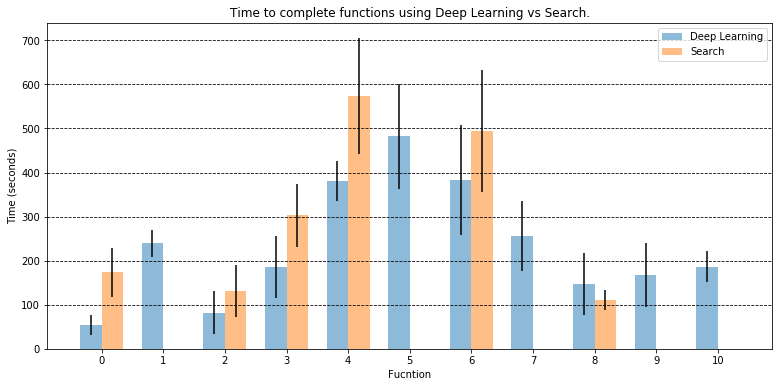

In [387]:
figure(figsize=(13, 6))

bar_width = 0.35

y_pos = np.arange(len(all_r[0]))

plt.bar(
    y_pos - bar_width/2, dl_means, bar_width,
    yerr=dl_stds,
    align='center',
    alpha=0.5,
    label='Deep Learning'
)
plt.bar(
    y_pos + bar_width/2, search_means, bar_width,
    yerr=search_stds,
    align='center',
    alpha=0.5,
    label='Search'
)

plt.xticks(y_pos)
# plt.yticks(range(0, 101, 10))
plt.grid(which='major', axis='y', color='black', linestyle='dashed')
plt.ylabel('Time (seconds)')
plt.xlabel('Fucntion')
plt.title('Time to complete functions using Deep Learning vs Search.')
plt.legend()
plt.show()

In [134]:
all_r = []
for i in range(len(SEARCH_FOLDERS)):
    times = sum(_get_total_seconds(SEARCH_FOLDERS[i]))
    all_r.append(times)

search_std = np.std(all_r)
search_mean = np.mean(all_r)

all_r = []
for i in range(len(DL_RESULT_FOLDERS)):
    times = sum(_get_total_seconds(DL_RESULT_FOLDERS[i]))
    all_r.append(times)

dl_std = np.std(all_r)
dl_mean = np.mean(all_r)

In [137]:
figure(figsize=(8, 6))

plt.bar(
    [0], dl_mean,
    yerr=dl_std,
    align='center',
    alpha=0.5,
)
plt.bar(
    [1], search_mean,
    yerr=search_std,
    align='center',
    alpha=0.5,
)

plt.xticks(range(2), ('Deep Learning', 'Search'))
plt.grid(which='major', axis='y', color='black', linestyle='dashed')
plt.ylabel('Toatal Time (seconds)')
plt.xlabel('Backend')
plt.title('Average time to complete user study depending on backend.')
plt.show()

In [9]:
dl_f_counts = []
for f in DL_FORFITS:
    dl_f_counts.append(len(f))

values = np.array(dl_f_counts)
dl_f_std = np.std(values)
dl_f_mean = np.mean(values)

search_f_counts = []
for f in SEARCH_FORFITS:
    search_f_counts.append(len(f))

values = np.array(search_f_counts)
search_f_std = np.std(values)
search_f_mean = np.mean(values)

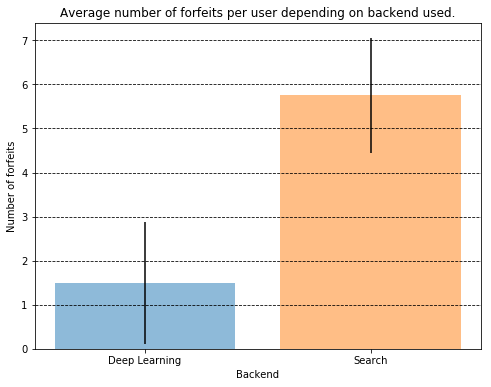

In [95]:
figure(figsize=(8, 6))

plt.bar(
    [0], dl_f_mean,
    yerr=dl_f_std,
    align='center',
    alpha=0.5,
)
plt.bar(
    [1], search_f_mean,
    yerr=search_f_std,
    align='center',
    alpha=0.5,
)

plt.xticks(range(2), ('Deep Learning', 'Search'))
plt.grid(which='major', axis='y', color='black', linestyle='dashed')
plt.ylabel('Number of forfeits')
plt.xlabel('Backend')
plt.title('Average number of forfeits per user depending on backend used.')
plt.show()

In [10]:
DL_FORFITS

[[9, 10], [], [], [5, 9], [5, 9, 10, 14], [5]]

In [81]:
forfits_per_q = [0] * 11

for fails in DL_FORFITS:
    for f in fails:
        fi = f - 3 - 1
        forfits_per_q[fi] += 1

for i in range(11):
    forfits_per_q[i] = 100 * (forfits_per_q[i]/len(DL_FORFITS))

std_per_q = [0] * 11
for i in range(11):
    nf = int((forfits_per_q[i]*len(SEARCH_FORFITS))/100)
    std_per_q[i] = np.std([1] * nf + [0] * (len(SEARCH_FORFITS) - nf))
    
forfits_per_q_dl = forfits_per_q
std_per_q_dl = std_per_q

In [89]:
forfits_per_q = [0] * 11

for fails in SEARCH_FORFITS:
    for f in fails:
        fi = f - 3 - 1
        forfits_per_q[fi] += 1

for i in range(11):
    forfits_per_q[i] = 100 * (forfits_per_q[i]/len(SEARCH_FORFITS))

std_per_q = [0] * 11
for i in range(11):
    nf = int((forfits_per_q[i]*len(SEARCH_FORFITS))/100)
    std_per_q[i] = np.std([1] * nf + [0] * (len(SEARCH_FORFITS) - nf))

forfits_per_q_search = forfits_per_q
std_per_q_search = std_per_q

In [94]:
dl_err = 0
search_err = 0

figure(figsize=(13, 6))

bar_width = 0.35

y_pos = np.arange(len(forfits_per_q))

plt.bar(
    y_pos - bar_width/2, forfits_per_q_dl, bar_width,
    yerr=dl_err,
    align='center',
    alpha=0.5,
    label='Deep Learning'
)
plt.bar(
    y_pos + bar_width/2, forfits_per_q_search, bar_width,
    yerr=search_err,
    align='center',
    alpha=0.5,
    label='Search'
)

plt.xticks(y_pos)
plt.yticks(np.arange(0, 101, 10))
plt.grid(which='major', axis='y', color='black', linestyle='dashed')
plt.ylabel('Precent forfeited the function.')
plt.xlabel('Fucntion')
plt.title('Precent that forfeited each function using Deep Learning vs Search.')
plt.legend()
plt.show()